# NumPy

`NumPy` используется как идеологическая и фактическая основа многих математических/научных библиотек в `Python`. В пакете реализованы  базовые операции над векторами, матрицами, алгоритмы линейной алгебры (`BLAS`), методы оптимизаций  и т.п. Базовый функционал `NumPy` составляют хорошо оптимизированные нативные библиотеки на языке `C` или `Fortran` (`OpenBLAS`, `Intel MKL` и т.п.)

`NumPy`被作为`Python`中许多数学/科学库的思想和事实基础。该软件包实现了对向量、矩阵、线性代数算法（`BLAS`）、优化方法等的基本操作。`NumPy`的基本功能由优化良好的`C`或 `Fortran`本地库组成（`OpenBLAS`、`Intel MKL`等）。

In [218]:
# импорт. Подобный вид импорта - стандарт де факто
import numpy as np

### Создание массивов创建数组

Основная концепция в `NumPy` - типизированный многомерный массив, весь остальной функцинал завязан вокруг этого. Если допускать упрощения, то массив `NumPy` - это совокупность трех сущностей: линейный буфер в памяти с данными, атрибут размерности и атрибут типа. 

`NumPy`的基本概念是一个类型化的多维数组；其余的功能都是围绕它展开的。简而言之，`NumPy`数组是三个实体的集合：内存中的线性缓冲区的数据，一个维度属性和一个类型属性。

Существует много способов [создания массива][创建一个数组]的方法有很多(http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)

Массив можно создать из обычного списка Python一个数组可以从一个普通的Python列表中创建

In [219]:
arr  = np.array([[1.5, 4.5], [1, 2]])

arr

array([[1.5, 4.5],
       [1. , 2. ]])

при этом `NumPy` автоматически выведет тип:
与`NumPy`自动输出类型。

In [220]:
arr.dtype

dtype('float64')

Массивы `NumPy` типизированы, тип массива выводится во время создания, но его можно указать явно с помощью набор констант или с помощью строки

`NumPy`数组是类型化的，数组类型在创建时输出，但也可以用一组常量或用一个字符串明确指定

In [221]:
arr  = np.array([[1.5, 4.5], [1, 2]], dtype=np.float64)
arr  = np.array([[1.5, 4.5], [1, 2]], "float64")

размерность массива можно узнать с помощью функции `np.shape()` или атрибута `.shape` 

数组的维度可以通过`np.shape()`函数或`.shape`属性找到。

In [222]:
arr.shape

(2, 2)

Типа массива можно поменять с помощью метода `.astype()`, при этом в чаще всего создастся новый массив

数组的类型可以通过`.astype()`方法来改变，最常见的是创建一个新的数组

In [223]:
arr.astype(np.int64)# 

array([[1, 4],
       [1, 2]], dtype=int64)


Существует большое количество специализированны функций для создания массивов. 

Создание одномерного массива из нулей:

有许多专门的函数用于创建数组。

创建一个一维的零数组：

In [224]:
np.zeros(5) # лучше np.zeros((5, ))

array([0., 0., 0., 0., 0.])

Двумерный массив (матрица) из нулей и целочисленными элементами
零和整数元素的二维阵列（矩阵）。

In [225]:
np.zeros((3, 3), dtype='int64')

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int64)

Трехмерный массив из единиц一个三维的单位阵列


In [226]:
np.ones((3, 3, 3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Массив из чисел от 1 включительно до 10 через 2一个从1（含）到10的数组，以2为单位。

In [227]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

Массив из чисел на отрезке от 1 до 10 состоящий и 5 элементов на равных промежутках一个范围在1到10的数字阵列，由5个元素组成，间隔相等

In [228]:
np.linspace(1, 10, 5)

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

Диагональная матрица с указанными элементами具有指定元素的对角线矩阵


In [229]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Единичная матрица单位矩阵

In [230]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Физически массивы `NumPy` - это массив байт, размерность хранится отдельно и её можно поменять с помощью метода `.reshape()` (общий размер не должен меняться). При этом создастся новый массив, но буфер с данными может остаться общим.

从物理上讲，`NumPy`数组是一个字节数组，尺寸是单独存储的，可以使用`.reshape()`方法来改变（总尺寸不应该被改变）。这将创建一个新的数组，但数据缓冲区可能保持共享。

Изменим размер матрицы $2 \times 3$ на $3 \times 2$. При этом данные буфера общие для двух массивов. 将矩阵大小 $2 \times 3$ 改为 $3 \times 2$。缓冲区的数据是两个数组共同的。

In [231]:
a = np.array([[1, 2, 3], [3, 4, 5]])
a

array([[1, 2, 3],
       [3, 4, 5]])

In [232]:
b = a.reshape((3, 2))
b

array([[1, 2],
       [3, 3],
       [4, 5]])

In [233]:
b[2, 0] = 7
b

array([[1, 2],
       [3, 3],
       [7, 5]])

In [234]:
a

array([[1, 2, 3],
       [3, 7, 5]])

Изменим размерность массива из чисел от 0 до 15

将数字数组的维度从0改成15

In [235]:
a = np.arange(0, 16)
b = a.reshape((2, 8))
a, b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15]]))

При этом видим, что у них общий буфер. Если мы изменим один массив, то изменится и другой
同时，我们看到它们有一个共同的缓冲区。如果我们改变一个数组，另一个也会改变。

In [236]:
b[1, 0] = 18
a, b

(array([ 0,  1,  2,  3,  4,  5,  6,  7, 18,  9, 10, 11, 12, 13, 14, 15]),
 array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [18,  9, 10, 11, 12, 13, 14, 15]]))

Для изменения общего размера массива применяется метод `.resize()`. При этом может производиться копирование данных, эту операцию следует использовать с осторожностью

`.resize()` 方法用于更改数组的总大小。此操作可能会复制数据，请谨慎使用。

In [237]:
a = np.arange(0, 16)
a.resize((3, 8))

a

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

Проверить, делят ли два массива общий буфер с данными можно с помощью функции `np.may_share_memory()`

要检查两个数组是否共享一个共同的数据缓冲区，请使用函数`np.may_share_memory()`。

In [238]:
a = np.array([1, 2, 3])
b = a.reshape((3, 1))

np.may_share_memory(a, b)

True

### Индексация массивов数组索引******

К элементам массива можно обращаться так же, как мы это делаем для списков или строк `Python`
数组元素的访问方式与我们在 `Python`中访问列表或字符串的方式相同。

In [239]:
a = np.arange(0, 16).reshape((4, 4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [240]:
 a[0, 2], a[0][2]

(2, 2)

#### Slicing切片

`Slicing` - это получение "среза" массива или под массива. В случае матрицы операцию можно интерпретировать как получение под матрицы. 

В данном случае берем первые две строки и 1,2-й столбец. 

`切片`是指获得一个数组或一个子数组的 "切片"。在矩阵的情况下，该操作可以被解释为获得一个子矩阵。

在这种情况下，我们取前两行和第1、2列。

In [241]:
a[0:2,1:3]

array([[1, 2],
       [5, 6]])

![Пример индексирования: https://scipy-lectures.org/](https://scipy-lectures.org/_images/numpy_indexing.png)

Можно оставить только третью строку, в этом случае получим одномерный массив
你可以只留下第三行，在这种情况下，你得到一个一维数组

In [242]:
a[2, :]

array([ 8,  9, 10, 11])

можно взять строки и столбцы в обратном порядке你可以把行和列的顺序颠倒一下

In [243]:
a[0:2, ::-1]

array([[3, 2, 1, 0],
       [7, 6, 5, 4]])

Slicing можно использовать для изменения массивов, например изменяем все элементы второго столбцы на 1.
切片可以用来改变数组，例如，将第二列的所有元素改为1。 

In [244]:
a[:, 1] = 1
a

array([[ 0,  1,  2,  3],
       [ 4,  1,  6,  7],
       [ 8,  1, 10, 11],
       [12,  1, 14, 15]])

Или первые два элемента первой строки或第一行的前两个元素

In [245]:
a[0, :2] = np.ones(2)
a

array([[ 1,  1,  2,  3],
       [ 4,  1,  6,  7],
       [ 8,  1, 10, 11],
       [12,  1, 14, 15]])

In [246]:
a = np.ones((5, 5)) * 8
a

array([[8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.]])

In [247]:
a[1:3, 2:4] = np.identity(2)
a

array([[8., 8., 8., 8., 8.],
       [8., 8., 1., 0., 8.],
       [8., 8., 0., 1., 8.],
       [8., 8., 8., 8., 8.],
       [8., 8., 8., 8., 8.]])

#### Advanced indexing高级索引

Если в качестве индексатора использовать массивы одинакового размера, то создастся подмасив из соответствующих элементов
如果使用相同大小的数组作为索引器，将创建一个对应元素的子数组

In [248]:
a = np.arange(16).reshape((4, 4))

rows = [1, 3]
columns = [2, 2]

a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [249]:
# получаем массив 得到数组 [ a[row[0], column[0]], a[row[1], column[1]] ]
a[rows, columns]

array([ 6, 14])

In [250]:
a[ [[0, 0], [1, 1]], [[2, 2], [3, 3]] ]

array([[2, 2],
       [7, 7]])

Можно смешивать способоы индексации你可以混合和匹配索引方法

In [251]:
a[[0, 1], :2], a[2:, [0, 1]]

(array([[0, 1],
        [4, 5]]),
 array([[ 8,  9],
        [12, 13]]))

Можно использовать маски из логических значений, получим новую матрица без второй строки你可以使用逻辑值的掩码，我们得到一个没有第二行的新矩阵

In [252]:
a = np.arange(16).reshape((4, 4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [253]:
a[[True, False, True, True]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### Базовые операции基本操作

Массивы имеют обширный набор методов для совершения тех или иных операций над своими элементами. Например для суммирования, нахождение максимума или минимума, нахождения среднего значения и мное другое. Характерная особенность таких операций состоит в том, что они могут применяться к элементам  по определенным осям ("вдоль оси").

Например, в данном примере происходит суммирование всех элементов матрицы, суммировании строк (вдоль оси "0") и столбцов (вдоль оси "1").

数组有广泛的方法来对其元素进行各种操作。例如，用于求和，寻找最大或最小值，寻找平均值，等等。这种操作的一个特点是，它们可以沿某些轴（"沿轴"）应用于元素。

例如，在这个例子中，所有的矩阵元素被相加，将行（沿 "0 "轴）和列（沿 "1 "轴）相加。

In [254]:
arr = np.arange(1, 17).reshape((4, 4))
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Сумма всех элементов所有元素的总和

In [255]:
arr.sum()

136

Сумма вдоль оси 0 (то есть по строкам)沿轴0求和（即按行求和）。

In [256]:
arr.sum(axis=0)

array([28, 32, 36, 40])

Сумма вдоль оси 1 (то есть по столбцам)沿轴1的总和（即列）。

In [257]:
arr.sum(axis=1)

array([10, 26, 42, 58])

Если трехмерный массив просуммировать по нулевой оси, то получится сумма матриц, составляющих младшие оси:

如果你沿零轴对三维阵列进行求和，你会得到构成小轴的矩阵之和。

In [258]:
arr = np.arange(0, 12).reshape((3, 2, 2))
arr

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [259]:
arr.sum(axis=0)

array([[12, 15],
       [18, 21]])

Два массива можно соединить вдоль определенной оси. При этом обязательно, чтобы вдоль этой оси размерность была одинаковой. В примере одна матрица присоединяется к другой "сверху" или "вдоль оси 0"
两个数组可以沿某一轴线连接。沿着这个轴线的维度必须是相同的。在这个例子中，一个矩阵 "从上面 "或 "沿着0轴 "连接到另一个矩阵。

In [260]:
a = np.arange(0, 5).reshape((1, 5))
b = np.arange(5, 10).reshape((1, 5))
np.concatenate((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Аналогично "вдоль оси 1"同样，"沿轴1"

In [261]:
np.concatenate((a, b), axis=1)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Для наглядности, если нужно соединить сверху или вдоль, то применяются методы `vstack` и `hstack`为了清楚起见，如果你想在顶部或纵向连接，则应用`vstack`和`hstack`方法

In [262]:
np.vstack((a, b))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [263]:
np.hstack((a, b))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

Для массивов `NumPy` переопределены все базовые математические операции, при этом они выполняются поэлементно, если размерности совпадают и с помощью специальных правил ("broadcasting") в противном случае

所有的基本数学运算都被 "NumPy "数组覆盖，如果尺寸相同，则逐个元素执行，否则使用特殊规则（"广播"）。

![https://web.stanford.edu/~schmit/cme193](img/broadcasting.png)

In [264]:
arr = np.ones((5, 5))
arr

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [265]:
arr + arr

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Если размерности не совпадают, то операции совершаются рекурсивно над подмассивом соответствующей размерности вдоль возможной старшей оси. Эти правила называются `broadcasting`

Ко всем элементам массива можно прибавить число


如果维度不匹配，那么就在相应维度的子数组上沿着可能的高轴递归地进行操作。这些规则被称为 `broadcasting`。

一个数字可以加到一个数组的所有元素上

In [266]:
arr + 2

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

Ко всем строкам можно прибавить строку一条线可以添加到所有的线

In [267]:
arr + np.array([1, 2, 3, 4, 5])

array([[2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6.]])

Ко всем столбцам - столбец对所有列--列

In [268]:
arr + np.array([[1], [2], [3], [4], [5]])

array([[2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6.]])

Ну или просто сложить два массива 或者简单地将两个数组相加

In [269]:
arr + np.ones(5)

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

Аналогично с операцией умножения (важно понимать, что это не матричное умножение), деления и так далее

类似的还有乘法（必须理解这不是矩阵乘法）、除法等操作

In [270]:
5 * arr

array([[5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5.]])

Синус над всеми элементами массива在一个数组的所有元素上的正弦

In [271]:
np.sin(arr)

array([[0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098],
       [0.84147098, 0.84147098, 0.84147098, 0.84147098, 0.84147098]])

Если сложить вектор столбец и строку - то получится двухмерный массив:

如果你把一个向量的列和一个行加起来，你就得到一个二维数组:

In [272]:
arr1 = np.arange(1, 6).reshape((5, 1))
arr2 = np.arange(100, 104)

arr1, arr2

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([100, 101, 102, 103]))

In [273]:
arr1 + arr2

array([[101, 102, 103, 104],
       [102, 103, 104, 105],
       [103, 104, 105, 106],
       [104, 105, 106, 107],
       [105, 106, 107, 108]])

Операции вдоль осей можно комбинировать с индексированием. Пусть есть массив:

沿轴的操作可以与索引相结合。假设有一个数组:

In [274]:
a = np.arange(16).reshape((4, 4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Просуммируем вдоль первой оси (по столбцам) и сравним с 8, получим маску - булевский массив, где элемент равен `True`, если сумма элементов строки больше 8

沿着第一轴（列）求和并与8比较，我们得到一个掩码--一个布尔数组，如果行元素的总和大于8，则该元素为 `True`。

In [275]:
a.sum(axis=1) > 8

array([False,  True,  True,  True])

Получение подматрицы, где остаются только те строки, сумма элементов которых строго больше 8

获得一个子矩阵，其中仅保留那些元素和严格大于 8 的行

In [276]:
a[a.sum(axis=1) > 8]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Базовые операции линейной алгебры применимы только над двухмерными массивами (то есть матрицами). Если передать массив большей размерности, то операция будет производиться над соответствующими подматрицами.

基本的线性代数操作只适用于二维数组（即矩阵）。如果你传递一个更大维度的数组，操作将在相应的子矩阵上执行。

In [277]:
mat = np.arange(16).reshape(4, 4)
#транспонирование转置
mat.T, mat.transpose()

# матричное умножение矩阵乘法
np.dot(mat, mat)
mat @ mat
mat.dot(mat)

# определитель识别符
np.linalg.det(mat)

# обратная матрица逆矩阵
np.linalg.inv(np.array([[1, 0], [0, 1]]))

# псевдообратная матрица伪逆矩阵
np.linalg.pinv(mat)

# собственные числа特征值
np.linalg.eigvals(mat)

# собственные вектора特征向量
np.linalg.eig(mat)

# SVD разложениеSVD分解
np.linalg.svd(mat)

(array([[-0.09184212, -0.83160389,  0.53515573,  0.11665482],
        [-0.31812733, -0.44586433, -0.80049034,  0.24334177],
        [-0.54441254, -0.06012478, -0.00448651, -0.836648  ],
        [-0.77069775,  0.32561478,  0.26982112,  0.47665141]]),
 array([3.51399637e+01, 2.27661021e+00, 1.69970911e-15, 8.07447880e-17]),
 array([[-0.42334086, -0.47243254, -0.52152422, -0.57061589],
        [ 0.72165263,  0.27714165, -0.16736932, -0.6118803 ],
        [-0.22125808,  0.66846675, -0.67315927,  0.2259506 ],
        [ 0.50104377, -0.50314233, -0.49684666,  0.49894522]]))

### Функции函数

Важно понимать, что для массивов, помимо умножения, деления и пр., нужно использовать лишь специализированные версии операций из пакета `NumPy`. Например, в данном примере при попытке использовать операцию  `cos` из стандартной библиотеки `Python` произойдет ошибка

重要的是要明白，对于数组，除了乘法、除法等之外，只应该使用`NumPy`包的专门版本的运算。例如，在这个例子中，试图使用标准`Python`库中的`cos`操作将导致一个错误

In [278]:
def foo(x):
    return x * np.cos(x) - np.sin(x)

foo(np.array([1, 2, 7]))

array([-0.30116868, -1.7415911 ,  4.62032918])

С помощью декоратора `vectorize` можно получить специализированную версию функции, которая будет применяться к массиву `NumPy` поэлементно. Важно понимать, что часто подобные операции неэффективны и их следует применять лишь в исключительных случаях

`vectorize`装饰器可以用来获得一个特殊版本的函数，以逐个元素应用于`NumPy`数组。重要的是要明白，这种操作往往是低效的，只应在特殊情况下使用。

In [279]:
@np.vectorize
def foo(x):
    if x > 5:
        return 1
    return 0

foo(np.array([1, 2, 7]))

array([0, 0, 1])

### Сохранение состояния保持现状

Массивы `NumPy` могут быть сохранены в бинарном виде с помощью функции `np.save()``NumPy`数组可以用`np.save()`函数以二进制形式保存。

In [280]:
import tempfile
with tempfile.NamedTemporaryFile(suffix='.npy') as fn:
    np.save(fn.name, np.array([1, 2, 3]))
    a = np.load(fn.name)
    print(a)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\张佳\\AppData\\Local\\Temp\\tmpl13rb3x0.npy'

### Случайные числа随机数

`NumPy` содержит большое количество различных математических функций. Остановимся на модуле `numpy.random` в котором содержится большое количество методов для получения массивов из псевдослучайных чисел.

Получение случайной матрицы $5 \times 5$ из целых чисел на полуинтервале от 0 до 5.`NumPy`包含大量不同的数学函数。让我们关注一下`numpy.random`模块，它包含了大量从伪随机数中获取数组的方法。

在0到5的半区间上获得一个5元乘5元的整数随机矩阵。

In [ ]:
import numpy.random as rnd

rnd.randint(0, 5, (5, 5))

array([[1, 1, 4, 3, 4],
       [3, 4, 0, 3, 2],
       [3, 0, 3, 0, 0],
       [0, 3, 1, 3, 4],
       [4, 0, 1, 1, 2]])

Сэмплинг матрицы размерностью $2 \times 2$ из нормального распределения, с математическим ожиданием 5 и среднеквадратичным отклонением 1. 

从正态分布中对维度为 $2 \times 2$ 的矩阵进行抽样，期望值为5，标准差为1。

In [ ]:
rnd.normal(5., 1, size=(2, 2))

array([[5.81779961, 4.22662152],
       [5.93272997, 5.96797189]])

Семплинг из распределения Дирихле.从 Dirichlet 分布中抽样。

In [ ]:
rnd.dirichlet(alpha=[2, 3])

array([0.1917997, 0.8082003])

### Большие массивы大型阵列

`np.memmap` позволяет создавать большие массивы с помощью механизма операционной системы memory mapped files. 

`np.memmap`允许你使用操作系统的内存映射文件机制来创建大型数组。

In [ ]:
import tempfile
with tempfile.NamedTemporaryFile() as fn:
    print(fn.name)
    
    fp = np.memmap(fn.name, dtype='float32', mode='w+', shape=(10000,10000))
    fp[:,0] = 5
    

C:\Users\张佳\AppData\Local\Temp\tmpkjqdlx60


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\张佳\\AppData\\Local\\Temp\\tmpkjqdlx60'

### HDF5

Позволяет эффективно хранить массивы и метаданные на диске в иерархическом виде  允许您以分层方式在磁盘上高效存储阵列和元数据

In [ ]:
import h5py
import time

with tempfile.NamedTemporaryFile() as fn:
    with h5py.File(fn.name, 'w') as f:    
        arr_1 = f.create_dataset("arr_1", (1000, 1000))
        arr_1[:] = np.random.random((1000, 1000))
        
        arr_2 = f.create_dataset("arr_2", (50, 50), data=np.ones((50, 50)))
        arr_2.attrs['Date'] = time.time()
        
        
    with h5py.File(fn.name, 'r') as f:     
        print(f["arr_2"].attrs["Date"])
        print(f["arr_2"][:])

ModuleNotFoundError: No module named 'h5py'

В целом таблица базовых операций с альтернативой в `PyTorch` выглядит так

|                           | NumPy                            | PyTorch                               |
|---------------------------|----------------------------------|---------------------------------------|
| Нулевая матриц            | `np.zeros((5, 5))`               | `torch.zeros(5, 5)`                   |
| Матрица из единиц         | `np.ones((5, 5))`                | `torch.ones(5, 5)`                    |
| Через заданный промежуток | `np.arange(1, 10, 1)`            | `torch.arange(1, 10, 1)`              |
| Через равные промежутки   | `np.linspace(1, 10, 5)`          | `torch.linspace(1, 10, 5)`            |
| Изменить размерность      | `x.reshape((1, 5))`              | `x.view(1, 5)`, `torch.reshape(1, 5)` |
| Узнать размерность        | `x.shape`                        | `x.size()`                            |
| Матричное умножение       | `x @ y, np.dot(x, y)`            | `torch.mm(x, y)`, `x @ y`             |
| Конкатенация              | `np.concatenate((x, y), axis=1)` | `torch.cat((x, x), axis=1)`           |
| Трансонирование           | `x.T`                            | `torch.transpose(x, 1, 0)`            |
| max                       | `x.max(axis=1)`                  | `val, ind = x.max(axis=1)`            |
| argmax                    | `x.argmax(axis=1)`               | `x.argmax(axis=1)`                    |
                                                                                                 

# Matplotlib

`Matplotlib` де факто стандарт для построения диаграмм и графиков в `Python`. В последнее время вытесняется более современными инструментами - `plotly`, `d3` и т.д.

`Matplotlib`是在 `Python`中绘制图表的事实标准。最近被更多的现代工具所取代--`plotly`，`d3`等。

График синуса и косинуса正弦和余弦图

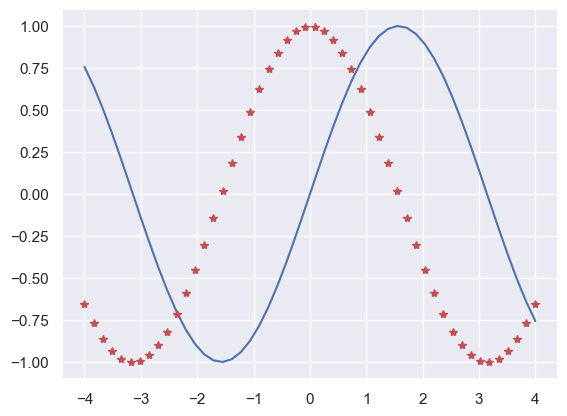

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

x = np.linspace(-4, 4, 50)
y = np.sin(x)

plt.plot(x, y)
plt.plot(x, np.cos(x), '*', c='r')

plt.show()

точечная диаграмма点阵图

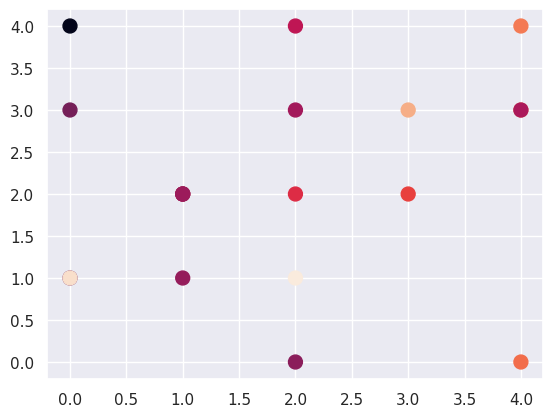

In [ ]:
xy = np.random.randint(0, 5, (20, 2))
c = np.random.random_sample(size=20)
plt.scatter(xy[:, 0], xy[:, 1], s=100, c=c)

Столбиковая диаграмма柱状图

<BarContainer object of 3 artists>

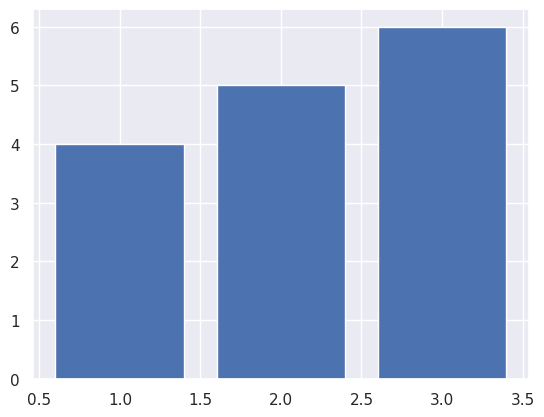

In [ ]:
plt.bar([1, 2, 3], [4, 5, 6])

виджеты小组件

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline


x = np.linspace(-10, 10, 100)

def func(a):
    plt.xlim((-10, 10))
    plt.ylim((-15, 15))
    plt.plot(x, np.cos(x) * a + x)
    plt.show()

interact(func, a=ipywidgets.IntSlider(min=-10,max=10,step=1,value=2))

interactive(children=(IntSlider(value=2, description='a', max=10, min=-10), Output()), _dom_classes=('widget-i…

<function __main__.func(a)>

более сложную инфографика更复杂的信息图表

Text(4, 40, '$\\int_4^9 f(x)\\mathrm{d}x$')

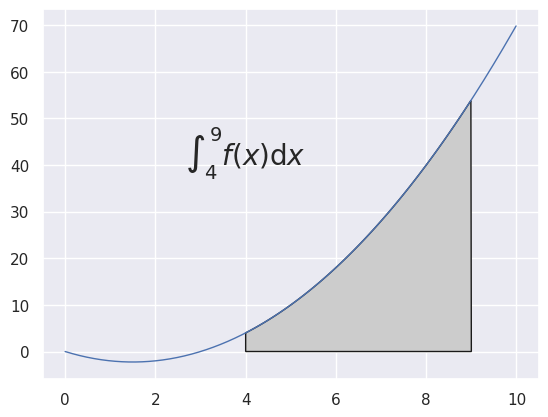

In [ ]:
import matplotlib.patches as pc

def func(x):
    return(x - 3) * x

ax = plt.subplot(111)

a, b = 4, 9 # integral area
x = np.arange(0, 10, 0.01)
y = func(x)
plt.plot(x, y, linewidth=1)

ix = np.arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = pc.Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

plt.text(a, 40,
     r"$\int_4^9 f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)


# Plotly

Графики отображаются с помощью HTML (требуется установка виджетов для `Jupyter`), рассчитан наработу с `Pandas`

使用HTML显示的图表（需要安装 `Jupyter`的部件），旨在与`Pandas`一起工作。

Объектное API对象API

In [ ]:
import plotly.graph_objects as go

x = np.linspace(-4, 4, 50)
y = np.sin(x)

fig = go.Figure(go.Scatter(
    x = x,
    y = y,
    mode='markers'
))

fig.show()

Классическое API经典API

In [ ]:
import plotly.express as px

x = np.linspace(-4, 4, 50)
y = np.sin(x)

px.line(x=x, y=y)

# Scipy

Пакет `SciPy` - это расширение `NumPy`, которое содержит большое количество функций для инженерных и научных вычислений. Например:

* поиск экстремума функций 
* численное интегрирование
* обработка сигналов
* решение систем ОДУ
* семплирование, математическая статистика

`SciPy`包是`NumPy`的一个扩展，包含了许多工程和科学计算的函数。比如说。

*函数极值的寻找 
* 数字整合
* 信号处理
* 解决ODE系统
* 抽样，数理统计

### Оптимизация 优化

Приведем пример поиска минимум функции:下面是一个寻找函数最小值的例子:

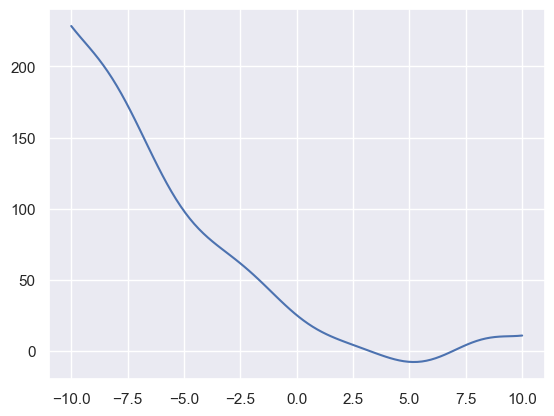

In [ ]:
import scipy as sp

def func(x):
    return (x - 2) * np.sin(x) + (x - 5.) ** 2 - x


x = np.linspace(-10, 10, 100)

plt.plot(x, func(x))

Применяем реализованный в `SciPy` алгоритм Бройдена — Флетчера — Гольдфарба — Шанно
应用Broyden-Fletcher-Goldfarb-Shanno算法，在`SciPy`中实现。

In [ ]:
sp.optimize.fmin_bfgs(func, 0)

Optimization terminated successfully.
         Current function value: -7.987077
         Iterations: 6
         Function evaluations: 18
         Gradient evaluations: 9


array([5.19725835])

# SimPy


`SymPy`- очень простая библиотека для символьных вычислений. Выражение задается декларативно с помощью синтаксиса `Python`. 

`SymPy`是一个非常简单的符号计算库。表达式是使用 `Python`语法声明性地定义的。

In [ ]:
import sympy
from sympy import Symbol, sin, lambdify
sympy.init_printing()


sym_x = Symbol('x')
sym_x**2 + 2

Например, посчитаем производную функции 例如，我们来计算一个函数的导数 $f(x) = (x-2) \cdot sin(x) + (x-5)^2 - x$

In [ ]:
sym_x = Symbol('x')
sym_y = (sym_x - 2) * sin(sym_x) + (sym_x - 5) ** 2 - sym_x
sym_diff = sym_y.diff(sym_x)

sym_y

In [ ]:
diff = lambdify(sym_x, sym_diff, 'numpy')

sp.optimize.fmin_bfgs(func, 0, diff)

Optimization terminated successfully.
         Current function value: -7.987077
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9


array([5.19725836])

In [ ]:
diff(5)

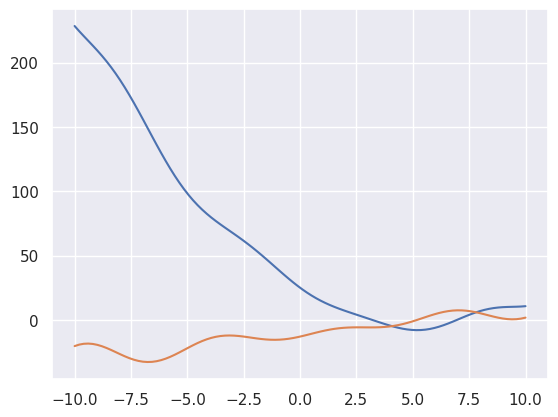

In [ ]:
plt.plot(x, func(x))
plt.plot(x, diff(x))